#Importing Libraries

In [1]:
!pip install flask-ngrok
!pip install gevent

     |████████████████████████████████| 5.3MB 8.2MB/s 
     |████████████████████████████████| 245kB 41.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 


In [2]:
from flask_ngrok import run_with_ngrok
from flask import Flask, redirect, url_for, request, render_template

In [3]:
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer
from flask import Flask, redirect, url_for

In [4]:
from __future__ import division, print_function
import sys
import os
import glob
import re
import json 

#Loading Trained Model

In [5]:
#UPLOAD THIS MODEL ZIP FILE BEFORE RUNNING THIS AND THEN RUN 
!unzip alexnetcustom10writers.zip -d alexnetcustom10writes

Archive:  alexnetcustom10writers.zip
   creating: alexnetcustom10writes/assets/
   creating: alexnetcustom10writes/variables/
  inflating: alexnetcustom10writes/saved_model.pb  
  inflating: alexnetcustom10writes/variables/variables.index  
  inflating: alexnetcustom10writes/variables/variables.data-00000-of-00001  


In [6]:
import tensorflow as tf
from tensorflow import keras
model=keras.models.load_model("/content/alexnetcustom10writes")

#Designing Image Output Generator(IOG) method

In [7]:
import cv2
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image

edged_image=""
iimg2=""
lst=[]
x=0
edged=""

classes=['ammaHW','ashishHW','aswadHW','DKmamHW','nagsHW','nandanaHW','pavanHW','pruthviHW','sravyaHW','yeshwanthHW']
def test_on_a_image(path="/content/datasetedgedv1/datasetedged/test_set/64/cropimg1000.jpeg"):
  test_image = image.load_img(path, target_size = (224, 224))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  max_person_score=-10
  max_name="default"
  for i in result:
    count=0
    print("------------------------------------------------")
    for j in i:
      if(j>max_person_score):
        max_person_score=j
        max_name=classes[count]
      z=float(format(j,'.5f'))
      print(classes[count]+"="+str(z*100)+'%',end="\n")
      count+=1
    print("------------------------------------------------")
  return max_name

def get_random_crop(image, crop_height, crop_width):
  max_x = image.shape[1] - crop_width
  max_y = image.shape[0] - crop_height
  x = np.random.randint(0, max_x)
  y = np.random.randint(0, max_y)
  crop = image[y: y + crop_height, x: x + crop_width]
  return crop
    
def sliding_window(no_of_crops,htsize=224,wdsize=224):
  iimg = edged
  writers1=[]
  for cnt in range(1,no_of_crops+1):
      global iimg2
      iimg2=get_random_crop(iimg,htsize,wdsize)
      cv2.imwrite('/content/croppedimg'+str(x)+'.jpeg', iimg2)
      cnt=cnt+1
      show_image(iimg2,"final"+str(cnt))
      ans=test_on_a_image('/content/croppedimg'+str(x)+'.jpeg')
      #print("returned_ans=",ans)
      writers1.append(ans)
      #print(writers1)
  dct={}
  for i in writers1:
    if i in dct:
      dct[i]=dct[i]+1
    else:
      dct[i]=1
  print(dct)
  max=-2222
  max_voted=""
  for key,value in dct.items():
    
    if(value>max):
      max=value
      max_voted=key
    value=(value/20)*100
  print(max_voted,max)

  return str(dct)

def show_image(image_object,name):
  plt.figure(figsize=(14, 7))
  plt.title(name)
  if(name!='Grayscale_Image'):
    plt.imshow(image_object)
  else:
    plt.imshow(image_object, cmap='Greys_r')


def preprocess1(image_path):
  image=cv2.imread(image_path)   #read in the image
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale
  blurred=cv2.GaussianBlur(gray,(5,5),0)  #(5,5) is the kernel size and 0 is sigma that determines the amount of blur
  global edged
  edged=cv2.Canny(blurred,30,50)  #30 MinThreshold and 50 is the MaxThreshold
  global x
  x=random.randint(100)
  new_image_name='edgedimg'+str(x)+'.jpeg'
  while x in lst:
    x=random.randint(100)
    new_image_name='edgedimg'+str(x)+'.jpeg'
  lst.append(x)
  global edged_image
  edged_image=new_image_name
  return sliding_window(20)

#REST API Using flask

Before running the below code, create a empty folder ips and create a folder templates and move front end files into it i.e index.html and base.html

In [ ]:
app=Flask(__name__,template_folder='/content/templates')
UPLOAD_FOLDER='/content/ips'
app.config['UPLOAD_FOLDER']=UPLOAD_FOLDER
run_with_ngrok(app)

@app.route("/")
def index():
  return  render_template('index.html')

@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        print("Image recieved on server")
        f = request.files['file']   # Get the file from post request
        file_path = os.path.join(app.config['UPLOAD_FOLDER'] ,f.filename)
        f.save(file_path)
        preds = preprocess1(file_path)
        print("preds=",preds)
        return preds
    return None
    
app.run()

------------------------------------------------
ammaHW=0.002%
ashishHW=0.002%
aswadHW=0.064%
DKmamHW=0.0%
nagsHW=0.008%
nandanaHW=0.001%
pavanHW=99.924%
pruthviHW=0.0%
sravyaHW=0.0%
yeshwanthHW=0.0%
------------------------------------------------
------------------------------------------------
ammaHW=0.0%
ashishHW=0.0%
aswadHW=0.0%
DKmamHW=0.0%
nagsHW=0.0%
nandanaHW=0.0%
pavanHW=100.0%
pruthviHW=0.0%
sravyaHW=0.0%
yeshwanthHW=0.0%
------------------------------------------------
------------------------------------------------
ammaHW=0.001%
ashishHW=0.0%
aswadHW=0.009000000000000001%
DKmamHW=0.0%
nagsHW=0.005%
nandanaHW=0.0%
pavanHW=99.984%
pruthviHW=0.0%
sravyaHW=0.0%
yeshwanthHW=0.0%
------------------------------------------------
------------------------------------------------
ammaHW=0.001%
ashishHW=0.0%
aswadHW=0.0%
DKmamHW=0.0%
nagsHW=0.006%
nandanaHW=0.0%
pavanHW=99.993%
pruthviHW=0.0%
sravyaHW=0.0%
yeshwanthHW=0.0%
------------------------------------------------
----------

"{'pavanHW': 20}"

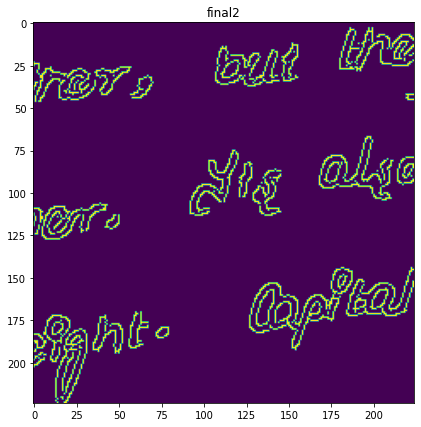

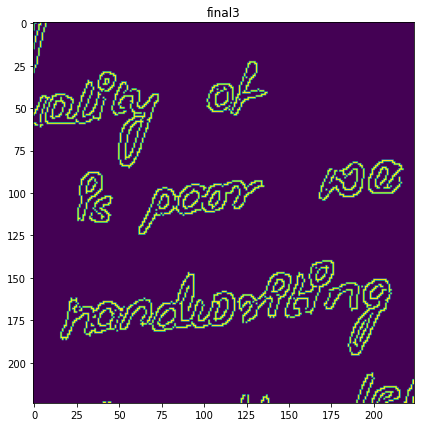

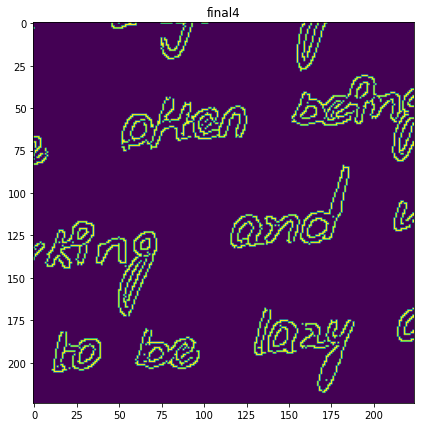

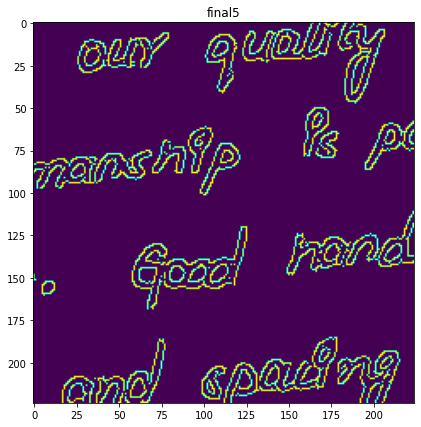

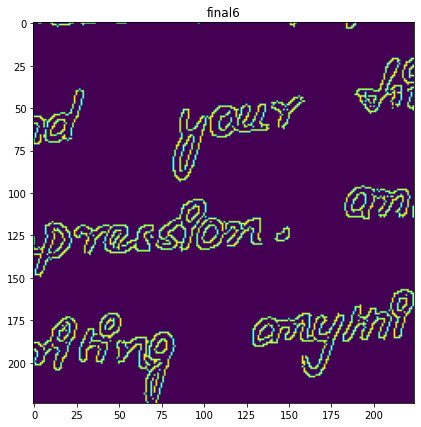

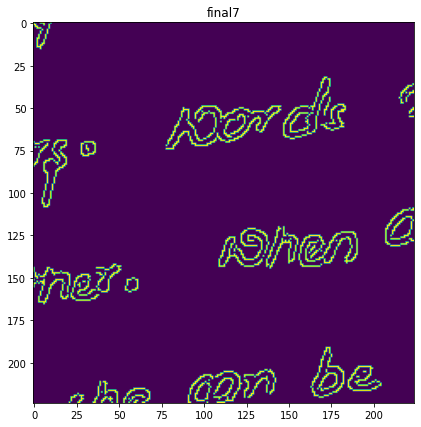

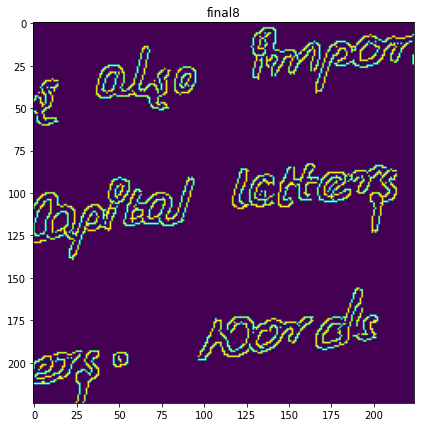

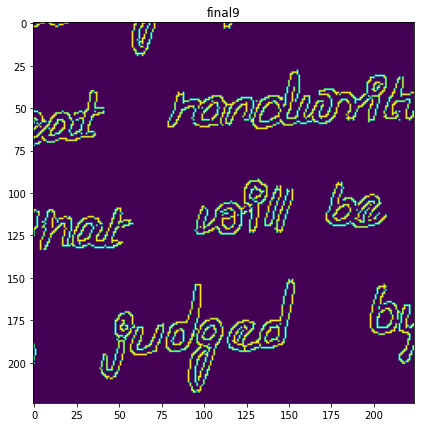

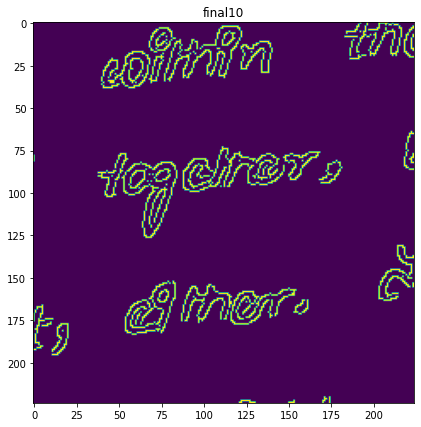

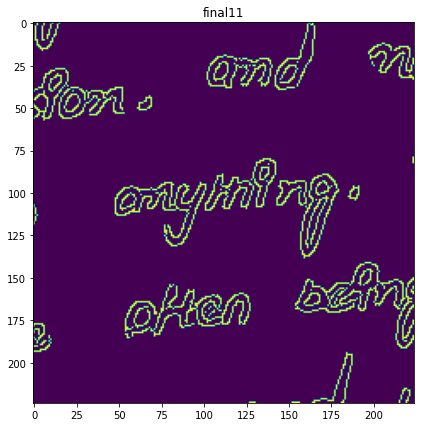

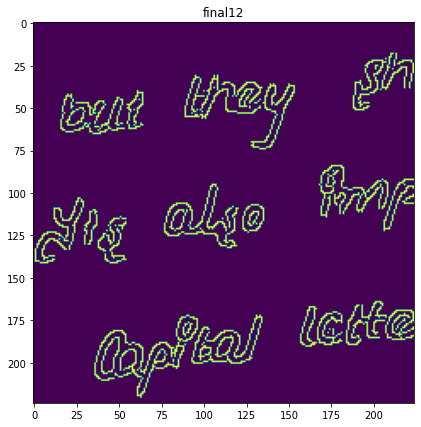

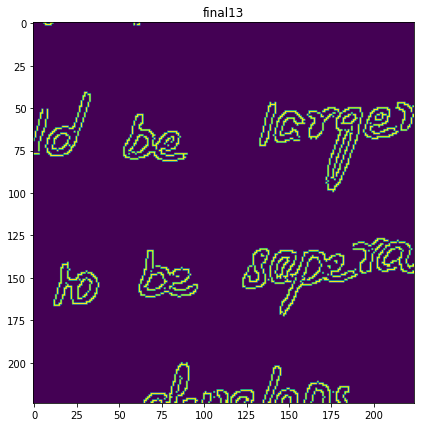

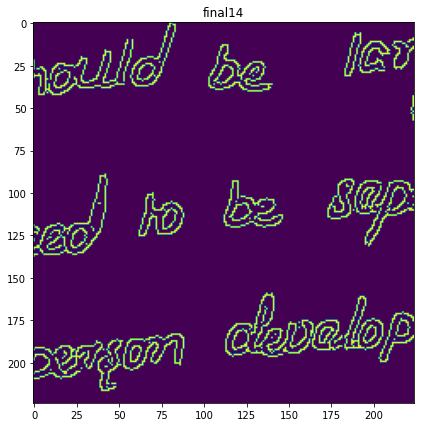

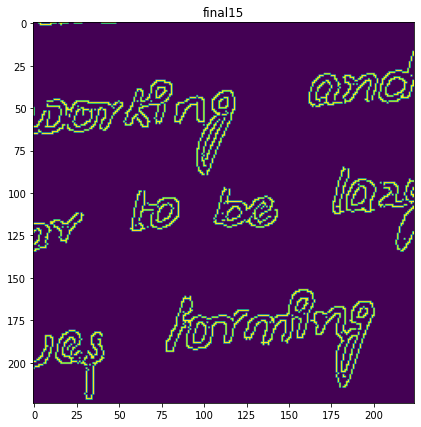

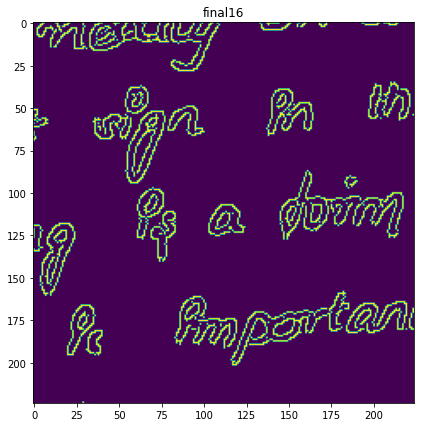

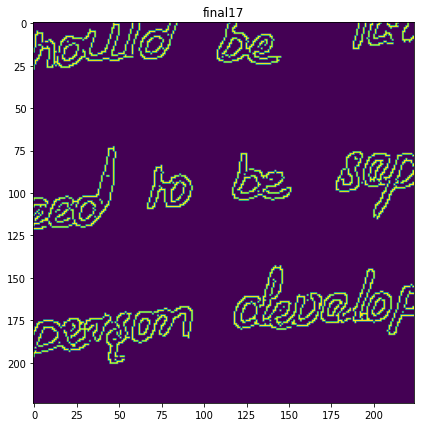

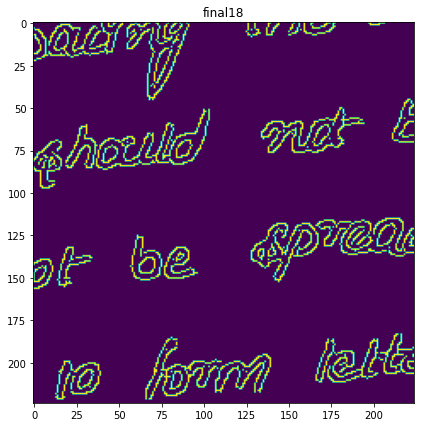

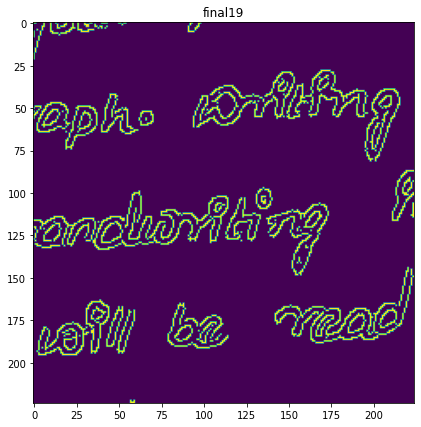

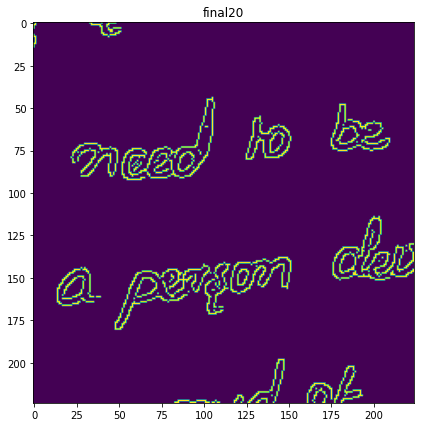

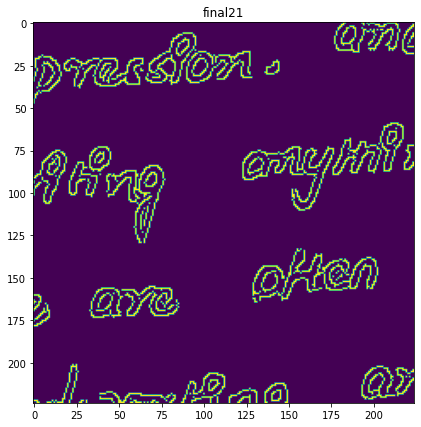

In [ ]:
#CUSTOM INPUT IMAGE TESTING

preprocess1("/content/pru-orighw.jpeg")

In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

In [ ]:
from flask import Flask
app = Flask(__name__)
@app.route("/")
def home():
    return "Hello, World!"
    
if __name__ == "__main__":
    app.run()